In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#import xgboost
#import eli5
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

import re

## Project 1 - NLP and Text Classification

For this project you will need to classify some angry comments into their respective category of angry. The process that you'll need to follow is (roughly):
<ol>
<li> Use NLP techniques to process the training data. 
<li> Train model(s) to predict which class(es) each comment is in.
    <ul>
    <li> A comment can belong to any number of classes, including none. 
    </ul>
<li> Generate predictions for each of the comments in the test data. 
<li> Write your test data predicitions to a CSV file, which will be scored. 
</ol>

You can use any models and NLP libraries you'd like. Think aobut the problem, look back to see if there's anything that might help, give it a try, and see if that helps. We've regularly said we have a "toolkit" of things that we can use, we generally don't know which ones we'll need, but here you have a pretty simple goal - if it makes it more accurate, it helps. There's not one specific solution here, there are lots of things that you could do. 

## Training Data

Use the training data to train your prediction model(s). Each of the classification output columns (toxic to the end) is a human label for the comment_text, assessing if it falls into that category of "rude". A comment may fall into any number of categories, or none at all. Membership in one output category is <b>independent</b> of membership in any of the other classes (think about this when you plan on how to make these predictions - it may also make it easier to split work amongst a team...). 

In [104]:
train_df = pd.read_csv("train.csv.zip")
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Test Data

In [105]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,comment_text
0,1,Yo bitch Ja Rule is more succesful then you'll...
1,2,== From RfC == \n\n The title is fine as it is...
2,3,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,4,":If you have a look back at the source, the in..."
4,5,I don't anonymously edit articles at all.


## Output Details, Submission Info, and Example Submission

For this project, please output your predictions in a CSV file. The structure of the CSV file should match the structure of the example below. 

The output should contain one row for each row of test data, complete with the columns for ID and each classification.

Into Moodle please submit:
<ul>
<li> Your notebook file(s). I'm not going to run them, just look. 
<li> Your sample submission CSV. This will be evaluated for accuracy against the real labels; only a subset of the predictions will be scored. 
</ul>

It is REALLY, REALLY, REALLY important the the structure of your output matches the specifications. The accuracies will be calculated by a script, and it is expecting a specific format. 

### Sample Evaluator

The file prediction_evaluator.ipynb contains an example scoring function, scoreChecker. This function takes a sumbission and an answer key, loops through, and evaluates the accuracy. You can use this to verify the format of your submission. I'm going to use the same function to evaluate the accuracy of your submission, against the answer key (unless I made some mistake in this counting function).

In [106]:
#Construct dummy data for a sample output. 
#You won't do this part first, you have real data - I'm faking it. 
#Your data should have the same structure, so the CSV output is the same
#dummy_ids = ["dfasdf234", "asdfgw43r52", "asdgtawe4", "wqtr215432"]
#dummy_toxic = [0,0,0,0]
#dummy_severe = [0,0,0,0]
#dummy_obscene = [0,1,1,0]
#dummy_threat = [0,1,0,1]
#dummy_insult = [0,0,1,0]
#dummy_ident = [0,1,1,0]
#columns = ["id", "toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
#sample_out = pd.DataFrame( list(zip(dummy_ids, dummy_toxic, dummy_severe, dummy_obscene, dummy_threat, dummy_insult, dummy_ident)),
                    #columns=columns)
#sample_out.head()

In [ ]:
#Write DF to CSV. Please keep the "out.csv" filename. Moodle will auto-preface it with an identifier when I download it. 
#This command should work with your dataframe of predictions. 
#sample_out.to_csv('out.csv', index=False)  

## Grading

The grading for this is split between accuracy and well written code:
<ul>
<li> 75% - Accuracy. The most accurate will get 100% on this, the others will be scaled down from there. 
<li> 25% - Code quality. Can the code be followed and made sense of - i.e. comments, sections, titles. 
</ul>

Some of the information we used and learned from for this NLP Project:
<li>Example 1 used: https://www.youtube.com/watch?v=R35TOqMTJlA
<li>Example 2: NIcholas Renotte: https://www.youtube.com/watch?v=ZUqB-luawZg
<li>Example 3: Understanding Text Classification in Python: https://www.datacamp.com/tutorial/text-classification-python
<li>**Example 4: Toxic Comment Classification using LSTM and LSTM-CNN:https://towardsdatascience.com/toxic-comment-classification-using-lstm-and-lstm-cnn-db945d6b7986

In [116]:
"""Below are function that were created as we went along and finally put into one place for the final project delivery."""

# Function to visualize the distribution of the targets, since we are dealing with more than one target.
def Multiple_Countplots(data, *columns):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
    for col, ax in zip(columns, axes.flatten()):
        sns.countplot(x=col, data=data, ax=ax)
        #ax.set_title(col)
        for p in ax.patches:
            #ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=10) 
            ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center', va = 'center', xytext = (0, 2), textcoords = 'offset points') # from azim_Utility classEDA
    plt.tight_layout()
    plt.show()
    return

# For the fun of it, we also decided to create a pie chart function that corresponds to the number of times an ANGRY/Rude word was captured by each target column.
def pie_chart(data, target):
    values=[]
    for col in target:
        values.append(data[col].sum())
    labels=list(target)
    plt.title('Distribution of ANGRY/RUDE words, captured by the Target column(s)')
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.show()
    return

# We decided to create a function to clean the text first.
# Not all methods are required within this function, but good to keep them all: no harm.
def clean_text(data, column):
    # Convert all text in column to lowercase using apply()
    data[column] = data[column].apply(str.lower)

    # Replace email addresses with 'email'
    data[column] = data[column].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress', regex=True)

    # Replace URLs with 'webaddress'
    data[column] = data[column].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress', regex=True)

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    data[column] = data[column].str.replace(r'£|\$', 'dollers', regex=True)

    # Replace 10 digit phone numbers with 'phonenumber'
    data[column] = data[column].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber', regex=True)

    # Replace numbers with 'number'
    data[column] = data[column].str.replace(r'\d+(\.\d+)?', 'number', regex=True)

    # Remove punctuations
    data[column] = data[column].str.replace(r'[^\w\d\s]', ' ', regex=True)

    # Remove extra whitespace
    data[column] = data[column].str.replace(r'\s+', ' ', regex=True)

    # Remove leading and trailing whitespace
    data[column] = data[column].str.replace(r'^\s+|\s+?$', '', regex=True)

    return data

# Function to generate word cloud for each target variable.
def generate_word_clouds(data):
    # Define the target variables
    target_vars = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

    # Download the stop words list
    #nltk.download('stopwords')

    # Create a set of stop words
    stop_words = set(stopwords.words('english'))

    # Create a frequency dictionary for each target variable
    freq_dicts = {}
    for target in target_vars:
        freq_dict = {}
        for comment in data[data[target]==1]['comment_text']:
            for word in comment.split():
                if word.lower() not in stop_words:
                    freq_dict[word] = freq_dict.get(word, 0) + 1
        freq_dicts[target] = freq_dict

        # Create a word cloud for each target variable
        wc = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(freq_dicts[target])
        plt.imshow(wc, interpolation='bilinear')
        plt.title(target)
        plt.axis('off')
        plt.show()

# Function to Evaluate the different types of algorithms that are popular with NLP Text Classification.
# Lots of people on youtube, github use NaiveBayes and rarely use LinearSVC. 
# So we decided to see which one is better for this project.
# We tried LogisticRegresison too, but it was taking waaaaaaaaaay to long to run.
def evaluate_models(data, target_cols):
    models = [
        #('Naive Bayes', MultinomialNB()),
        ('Logistic Regression', LogisticRegression(class_weight='balanced',n_jobs=-1, random_state=42, max_iter=10000)),
        ('LinearSVC', LinearSVC(class_weight='balanced', max_iter=10000, random_state=42))]
    
    results = [] # list created to create a dataframe of the results.
    X = data['comment_text']
    for col in target_cols: # target_cols defined before initiating the function.
        y = data[col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scores = [] # list created to store the scores
        for name, model in models:
            pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', model)
            ])
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            f1 = f1_score(y_test, y_pred) # using f1-score to find the best model.
            scores.append(f1)
        results.append((col, scores))
    df = pd.DataFrame(results, columns=['Target', 'F1 scores'])
    return df # returns the dataframe with scores

# Created a function to create a pipeline
def create_pipeline():
    """Linear SVM: When the data points are linearly separable into two classes, the data is called linearly-separable data...
        We use the linear SVM classifier to classify such data."""
    
    """TFIDF works by proportionally increasing the number of times a word appears in the document..
             but is counterbalanced by the number of documents in which it is present. 
                Hence, words like ‘this’, ’are’ etc.,..
                  that are commonly present in all the documents are not given a very high rank."""
    """max_features determines the maximum number of features to be extracted from the input text data. 
        It is an optional parameter that can be set to an integer value or to None. If it is set to an integer value,..
          the TfidfVectorizer will extract at most that number of features from the input text. 
          If it is set to None, it will extract all the features from the input text"""
    pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_features=20000)),
                         ('clf', LogisticRegression(max_iter=10000,n_jobs=-1))
                             #('clf', LinearSVC(max_iter=10000, solver='saga'))
                             ])
    #pipeline = Pipeline([('tfidf', TfidfVectorizer(max_df=.25, ngram_range=(1,2), stop_words='english')),
                             #('clf', LinearSVC(class_weight='balanced', max_iter=10000, random_state=42, dual=False, C=1))])
    """ Class_weight adjusts the cost function of the model so that misclassifying an..
        observation from the minority class is more heavily penelized than misclassifying an obeservation from the majority class."""
    """ max_iteration has been set to 10,000 since the code was asking for something higher that 1,000"""
    return pipeline


""" In the following function, we've added two lines to evaluate the model on the training data before moving to the test data. We've also ..
        added a line to create new columns in the test data for the predicted values of each target variable,...
          so that we can compare the predicted values with the actual values in the test data. 
          The function prints out the Classification Report output to text editor. """

def train_model(train_df, test_df, pipeline):
    # Clean the text data within the function for both train_df and test_df
    train_df = clean_text(train_df, 'comment_text') 
    test_df = clean_text(test_df, 'comment_text')

    # Define the target variables
    target_vars = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

    """ The following code loops through each target variable and spit of the training and testing classification report.
            Same Pipeline is then used to predict the test_df[comment_text] and eventually creating a new column...
            within the test_df dataframe in the same order target_vars listed above."""

    # Train the model for each target variable: loop through and also 
    for target in target_vars:
        y_train = np.array(train_df[target]).reshape(-1,1)
        print('Column Name: ', target)
        # Split the training data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(train_df['comment_text'], y_train.ravel(), random_state=42)

        # Create a pipeline for the model
        #pipeline = Pipeline([('tfidf', TfidfVectorizer(max_df=.25, ngram_range=(1,2), stop_words='english')),
                             #('clf', LinearSVC(class_weight='balanced', max_iter=10000, random_state=42, dual=False, C=1))
                             #('clf', LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42, n_jobs=-1, solver='saga'))])

        # Fit the model on the training data of train_df
        pipeline.fit(X_train, y_train)

        # Evaluate the model on the training data of train_df
        y_pred_train = pipeline.predict(X_train)
        #print(pipeline)
        print(f'Evaluation for {target} on TRAINING data:')
        print(classification_report(y_train, y_pred_train))

        # Evaluate the model on the validation data of train_df (the unseen data on train_df)
        y_pred_val = pipeline.predict(X_val)
        print(f'Evaluation for {target} on TESTING data:')
        print(classification_report(y_val, y_pred_val))
        print()
        print('------------------------------------------------------')

        # Predict the target variable for the test data from test_df
        test_df[f'{target}'] = pipeline.predict(test_df['comment_text']) # the test comment_text is already cleaned.

    # Return the test data with predicted target variables
    return test_df

## EDA
<li> Test Data

In [108]:
display(test_df.info(), test_df.isnull().sum(), test_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  int64 
 1   comment_text  153164 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


None

id              0
comment_text    0
dtype: int64

(153164, 2)

<li>Training Data

In [109]:
display(train_df.info(), train_df.isnull().sum(), train_df.describe().T, train_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


None

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

,count,mean,std,min,25%,50%,75%,max
toxic,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
severe_toxic,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
obscene,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
insult,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
identity_hate,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


(159571, 8)

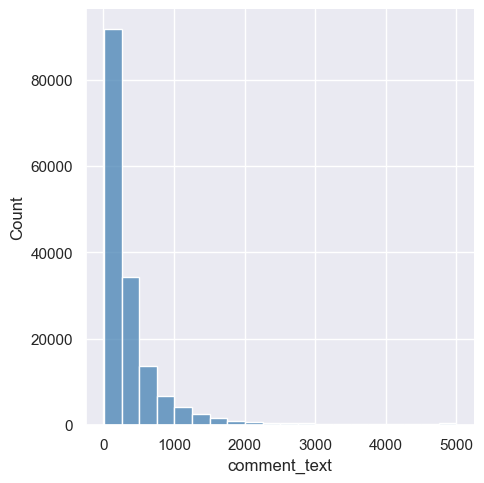

In [110]:
# https://github.com/tianqwang/Toxic-Comment-Classification-Challenge/blob/master/Toxic_Comment_Classification.ipynb
# Lets look at the lenght of the comments and how many correspond to them using sns.displot()
sns.set(color_codes=True)
comment_len = train_df.comment_text.str.len()
sns.displot(comment_len, kde=False, bins=20, color="steelblue")

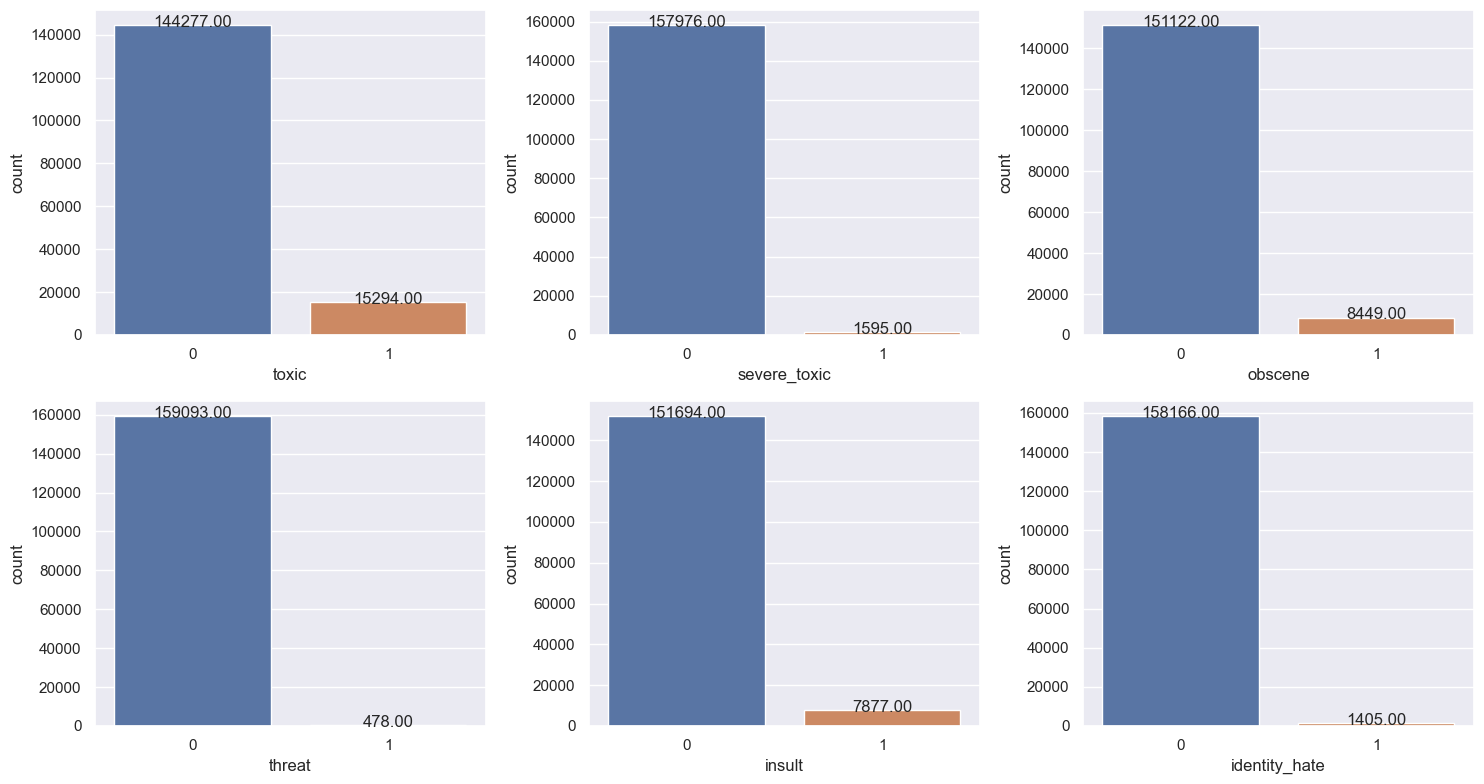

In [113]:
columns=['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

Multiple_Countplots(train_df, *columns)

 ******************** From the above countplots, we can see TOXIC column has the hightest observation @ 15294 and THREAT column has the lowest @ 478 ********************

## Train model(s) to predict which class(es) each comment is in.
<li> A comment can belong to any number of classes, including none. 
    </ul>
<li> Generate predictions for each of the comments in the test data. 
<li> Write your test data predicitions to a CSV file, which will be scored. 
</ol>

</ol>
Target, y, Variables will be the following columns:
<li> y_toxic: Toxic column
<li> y_severe_toxic: Severe_Toxic column
<li> y_obscene: Obscene column
<li> y_threat: Threat olumns
<li> y_insult: Insult column
<li> y_identity_hate: Identity_hate columns
<il>
</ol>


Since we have to train model to predict which class(es) each comment is in, than we would have to train-test split on every Target column individually.

</ol>
X Variable will be the following column(s):
<li> comment_text

An NLP Text Classification project is not an NLP Text Classification project without looking the the ANGRY Words that are predicted by the target columns.
Let's use the wordcloud library to see how each of the targets are distributed using the wordcloud.

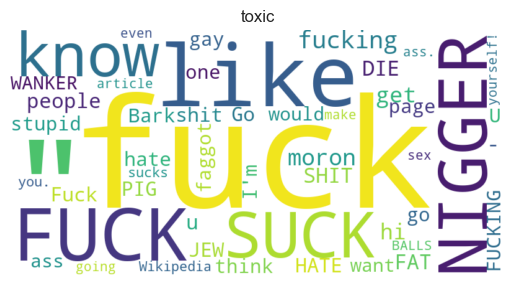

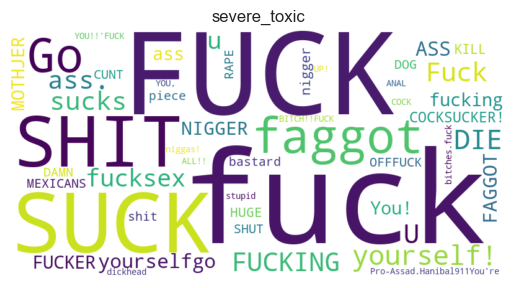

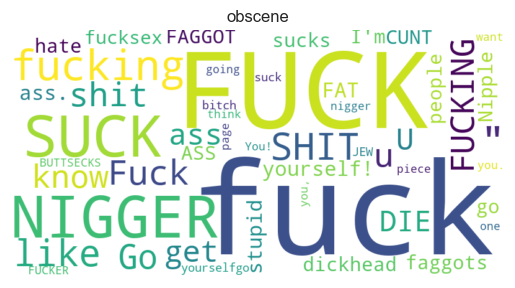

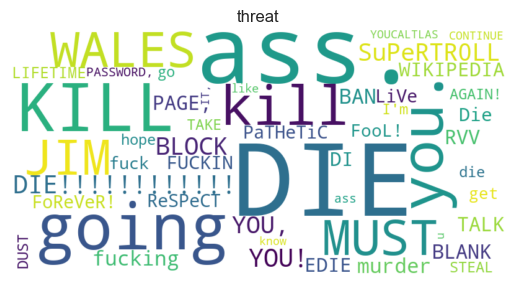

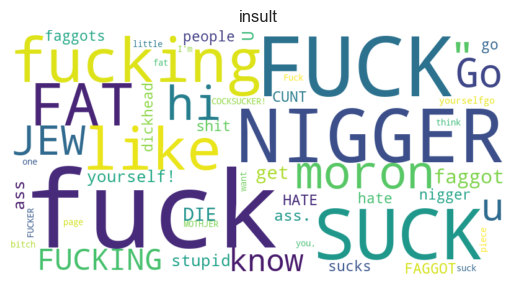

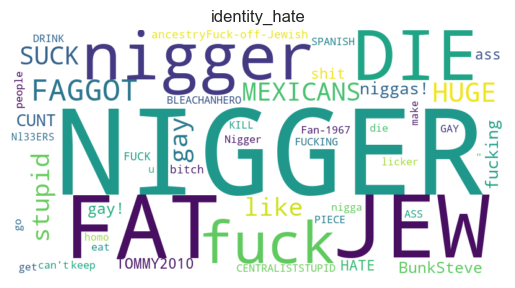

In [118]:
generate_word_clouds(train_df)

Evaluating which model (LogisticRegression() or LinearSVC) is good for our project.
<li> Prajesh prefers Logistic
<li> Azim prefers LinearSVC

In [ ]:
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
results = evaluate_models(train_df, target_cols)
results

,Target,F1 scores
0,toxic,"[0.7423505862167573, 0.755684419349916]"
1,severe_toxic,"[0.41001564945226915, 0.43433298862461217]"
2,obscene,"[0.784037558685446, 0.7936507936507936]"
3,threat,"[0.29059829059829057, 0.37433155080213903]"
4,insult,"[0.6886063325853902, 0.6877777777777777]"
5,identity_hate,"[0.3778162911611785, 0.4478442280945758]"


We did pick LinearSVC for the train_model function below, however, Prajesh wanted to see the logisticRegression on the same function too. What we noticed is that, Logistic Regression did way better on the under balanced target variables severe_toxic, threat and identity_hate. The other targets were essentially the same scores.

### Trainign the model and visualizing the Classification Report and CREATING new columns to test_df for prediction evaluator.

In [119]:
# Initiate the pipeline
create_pipeline()



Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=20000, stop_words='english')),
                ('clf', LogisticRegression(max_iter=10000, n_jobs=-1))])

In [120]:
# train the model on train_df and create new test_df dataframe.
# After running multiple tries, we ended up with logisticRegression with the following hyperparameters:
# max_iter=10000,n_jobs=-1 to get a maximum precision score on the test. 
train_model(train_df, test_df, create_pipeline())

Column Name:  toxic
Evaluation for toxic on TRAINING data:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    108199
           1       0.94      0.63      0.75     11479

    accuracy                           0.96    119678
   macro avg       0.95      0.81      0.87    119678
weighted avg       0.96      0.96      0.96    119678

Evaluation for toxic on TESTING data:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     36078
           1       0.91      0.60      0.72      3815

    accuracy                           0.96     39893
   macro avg       0.94      0.80      0.85     39893
weighted avg       0.95      0.96      0.95     39893


------------------------------------------------------
Column Name:  severe_toxic
Evaluation for severe_toxic on TRAINING data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    118489
           

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,yo bitch ja rule is more succesful then you ll...,1,0,1,0,1,0
1,2,from rfc the title is fine as it is imo,0,0,0,0,0,0
2,3,sources zawe ashton on lapland,0,0,0,0,0,0
3,4,if you have a look back at the source the info...,0,0,0,0,0,0
4,5,i don t anonymously edit articles at all,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153159,153160,i totally agree this stuff is nothing but too ...,1,0,0,0,0,0
153160,153161,throw from out field to home plate does it get...,0,0,0,0,0,0
153161,153162,okinotorishima categories i see your changes a...,0,0,0,0,0,0
153162,153163,one of the founding nations of the eu germany ...,0,0,0,0,0,0


In [121]:
test_df.drop(columns='comment_text', inplace=True)
test_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,1,0,1,0,1,0
1,2,0,0,0,0,0,0
2,3,0,0,0,0,0,0
3,4,0,0,0,0,0,0
4,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
153159,153160,1,0,0,0,0,0
153160,153161,0,0,0,0,0,0
153161,153162,0,0,0,0,0,0
153162,153163,0,0,0,0,0,0


In [122]:
test_df.to_csv('out.csv', index=False) 